<a href="https://colab.research.google.com/github/anam04/Marketing_Data_Analysis/blob/main/Marketing_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Summary+Clustering**

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
#Importing the data into a master dataframe 'df'
# We have shifted the columns form original dataset for convenient selection of target and indep variable during classification
df = pd.read_excel("AIDA_Dataset.xlsx")
df.head()

,CustomerID,Age,Gender,Income,SpendingScore,OnlineShoppingFrequency,PreferredChannel,CustomerSatisfaction,PromotionalEmailsOpened,ProductReturns,LoyaltyProgram,ConversionRate
0,1,56,Male,129952,34,5,Online,9,40,5,No,0.045971
1,2,69,Female,74235,91,19,In-Store,4,11,1,No,0.037305
2,3,46,Female,78565,67,15,In-Store,9,19,4,Yes,0.167028
3,4,32,Female,75342,26,1,Both,1,33,0,No,0.218419
4,5,60,Male,62723,35,5,Both,5,35,7,No,0.192754


In [ ]:
from sklearn.preprocessing import StandardScaler
#Normalising features around 0 for all continuous variables to reduce varying magnitudes as all columns have diff units
features = df[['Income','SpendingScore', 'OnlineShoppingFrequency']]
stdscaler = StandardScaler()
df[['Income','SpendingScore', 'OnlineShoppingFrequency']] = stdscaler.fit_transform(features)
df

,CustomerID,Age,Gender,Income,SpendingScore,OnlineShoppingFrequency,PreferredChannel,CustomerSatisfaction,PromotionalEmailsOpened,ProductReturns,LoyaltyProgram,ConversionRate
0,1,56,Male,1.202254,-0.897715,-0.979877,Online,9,40,5,No,0.045971
1,2,69,Female,-0.276837,1.713320,1.471960,In-Store,4,11,1,No,0.037305
2,3,46,Female,-0.161891,0.613937,0.771435,In-Store,9,19,4,Yes,0.167028
3,4,32,Female,-0.247450,-1.264176,-1.680401,Both,1,33,0,No,0.218419
4,5,60,Male,-0.582441,-0.851907,-0.979877,Both,5,35,7,No,0.192754
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,55,Male,0.050375,-0.485446,-0.454483,Both,2,4,1,Yes,0.263785
9996,9997,51,Female,-0.897123,-0.989330,-0.629614,Both,7,49,0,Yes,0.087479
9997,9998,57,Female,0.011431,-0.943523,-1.330139,Both,3,21,1,Yes,0.173484
9998,9999,64,Male,0.947487,1.530089,1.471960,In-Store,8,4,1,Yes,0.236795


In [ ]:
summary = df[['OnlineShoppingFrequency', 'Income', 'SpendingScore']].describe()
print(summary)

       OnlineShoppingFrequency        Income  SpendingScore
count             1.000000e+04  1.000000e+04   1.000000e+04
mean             -5.933032e-17  9.947598e-18   1.582734e-16
std               1.000050e+00  1.000050e+00   1.000050e+00
min              -1.680401e+00 -1.716109e+00  -2.409367e+00
25%              -8.047454e-01 -8.862123e-01  -7.602921e-01
50%               7.091062e-02  6.612876e-03   1.843757e-02
75%               9.465666e-01  8.612177e-01   7.971672e-01
max               1.647091e+00  1.734060e+00   2.125588e+00


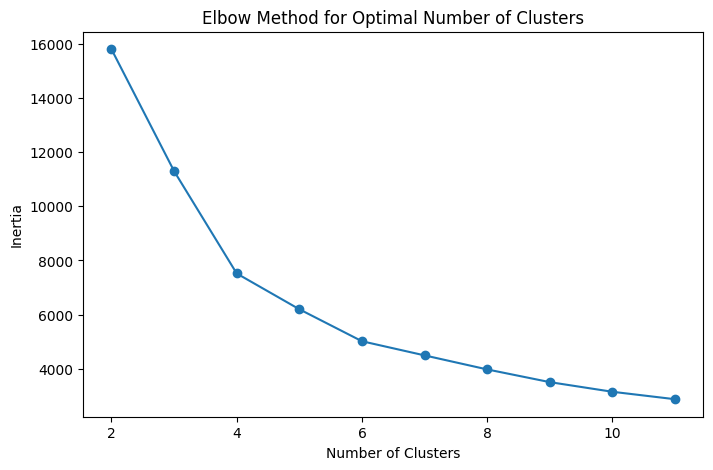

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df_scaled = df[['SpendingScore', 'Income', 'OnlineShoppingFrequency']]

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(2, 12), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Optimal number of clusters is chosen based on the elbow point
# Assume 4 clusters for this analysis (adjustable based on the elbow method outcome)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(df_scaled)
df['Cluster'] = clusters


In [ ]:
# Move the last column to the first position
last_column = df.columns[-1]  # Get the name of the last column
df.insert(0, last_column, df.pop(last_column))

df.head()
#shifting cluster column for convenience

,Cluster,CustomerID,Age,Gender,Income,SpendingScore,OnlineShoppingFrequency,PreferredChannel,CustomerSatisfaction,PromotionalEmailsOpened,ProductReturns,LoyaltyProgram,ConversionRate
0,3,1,56,Male,1.202254,-0.897715,-0.979877,Online,9,40,5,No,0.045971
1,4,2,69,Female,-0.276837,1.713320,1.471960,In-Store,4,11,1,No,0.037305
2,4,3,46,Female,-0.161891,0.613937,0.771435,In-Store,9,19,4,Yes,0.167028
3,1,4,32,Female,-0.247450,-1.264176,-1.680401,Both,1,33,0,No,0.218419
4,1,5,60,Male,-0.582441,-0.851907,-0.979877,Both,5,35,7,No,0.192754


In [ ]:
import pandas as pd

# Define the overall means for each variable from your provided summary
overall_means = {
    'OnlineShoppingFrequency': 1.582734e-16,  # The mean value close to zero
    'Income': -4.227729e-17,  # The mean value close to zero
    'SpendingScore': 9.947598e-18  # The mean value close to zero
}

# Load the data including cluster labels (assuming you have already performed clustering and have a column 'Cluster')

# Calculate the mean of each variable within each cluster
cluster_means = df.groupby('Cluster')[['OnlineShoppingFrequency', 'Income', 'SpendingScore']].mean()

# Iterate through each cluster to determine the category based on overall mean
for index, row in cluster_means.iterrows():
    print(f"Cluster {index}:")
    for variable in ['OnlineShoppingFrequency', 'Income', 'SpendingScore']:
        category = 'High' if row[variable] > overall_means[variable] else 'Low'
        print(f"  {variable}: {category}")

Cluster 0:
  OnlineShoppingFrequency: High
  Income: High
  SpendingScore: High
Cluster 1:
  OnlineShoppingFrequency: Low
  Income: Low
  SpendingScore: Low
Cluster 2:
  OnlineShoppingFrequency: High
  Income: Low
  SpendingScore: Low
Cluster 3:
  OnlineShoppingFrequency: Low
  Income: High
  SpendingScore: Low
Cluster 4:
  OnlineShoppingFrequency: High
  Income: Low
  SpendingScore: High


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler



# Binary mapping using if-else
df['LoyaltyProgram'] = df['LoyaltyProgram'].apply(lambda x: 1 if x == 'Yes' else 0)

df.head()



,Cluster,CustomerID,Age,Gender,Income,SpendingScore,OnlineShoppingFrequency,PreferredChannel,CustomerSatisfaction,PromotionalEmailsOpened,ProductReturns,LoyaltyProgram,ConversionRate
0,3,1,56,Male,1.202254,-0.897715,-0.979877,Online,9,40,5,0,0.045971
1,4,2,69,Female,-0.276837,1.713320,1.471960,In-Store,4,11,1,0,0.037305
2,4,3,46,Female,-0.161891,0.613937,0.771435,In-Store,9,19,4,1,0.167028
3,1,4,32,Female,-0.247450,-1.264176,-1.680401,Both,1,33,0,0,0.218419
4,1,5,60,Male,-0.582441,-0.851907,-0.979877,Both,5,35,7,0,0.192754


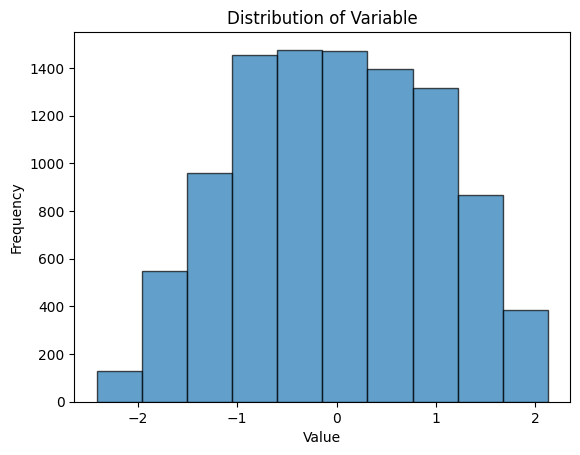

In [ ]:
#checking distribution of dependent variable
plt.hist(df['SpendingScore'], bins=10, edgecolor='k', alpha=0.7)
plt.title("Distribution of Variable")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

The distribution appears normal/bell curve.

ANOVA

In [ ]:
#importing required libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
# Ols = Ordinary least squares
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

                       sum_sq      df        F    PR(>F)
PreferredChannel     0.512608     2.0  0.25624  0.773961
Residual          9999.487392  9997.0      NaN       NaN


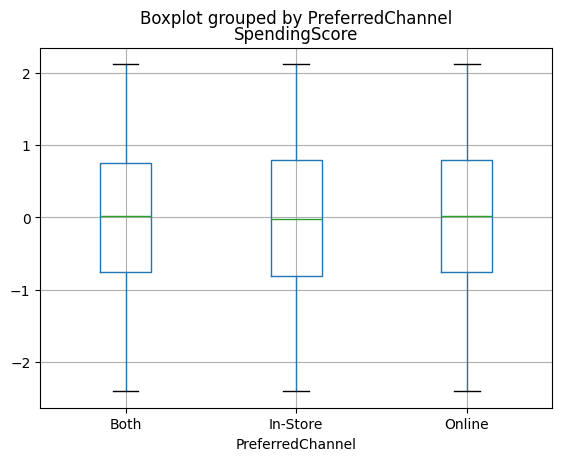

In [ ]:
model = ols('SpendingScore~PreferredChannel',data = df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
#This gives the anova table comparing spending scores across different preferred shopping channels
print(aov_table)
df.boxplot('SpendingScore', 'PreferredChannel');
#boxplot to check the homogeneity of variance


In [ ]:
# Using Shapiro-Wilkinson test to check if data is normally distributed
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler

stat, p = shapiro(df['SpendingScore'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# Ho = data is normal
# Ha = data is not normal
# if p-value < 0.05 reject the null hypothesis
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (Normal) (fail to reject H0)')
else:
	print('Sample does not look Gaussian(Normal) (reject H0)')

Statistics=0.985, p=0.000
Sample does not look Gaussian(Normal) (reject H0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


Regression Analysis

In [ ]:
#importing libraries
import numpy as np #numerical python
import pandas as pd #python dataframe
import seaborn as sns # for plotting
import matplotlib.pyplot as plt # for plotting
import statsmodels.api as sm # regression function is here

In [ ]:
df['Age'] = stdscaler.fit_transform(df[['Age']])
df.head()

,Cluster,CustomerID,Age,Gender,Income,SpendingScore,OnlineShoppingFrequency,PreferredChannel,CustomerSatisfaction,PromotionalEmailsOpened,ProductReturns,LoyaltyProgram,ConversionRate
0,3,1,0.835671,Male,1.202254,-0.897715,-0.979877,Online,9,40,5,0,0.045971
1,4,2,1.707517,Female,-0.276837,1.713320,1.471960,In-Store,4,11,1,0,0.037305
2,4,3,0.165020,Female,-0.161891,0.613937,0.771435,In-Store,9,19,4,1,0.167028
3,1,4,-0.773891,Female,-0.247450,-1.264176,-1.680401,Both,1,33,0,0,0.218419
4,1,5,1.103931,Male,-0.582441,-0.851907,-0.979877,Both,5,35,7,0,0.192754


In [ ]:
X=df[['Age','Income','OnlineShoppingFrequency']] #variables used to predict spending score
Y=df['SpendingScore'] #variable to be predicted
reg_variables=df[['Age','Income','OnlineShoppingFrequency','SpendingScore']] #variables used in regression

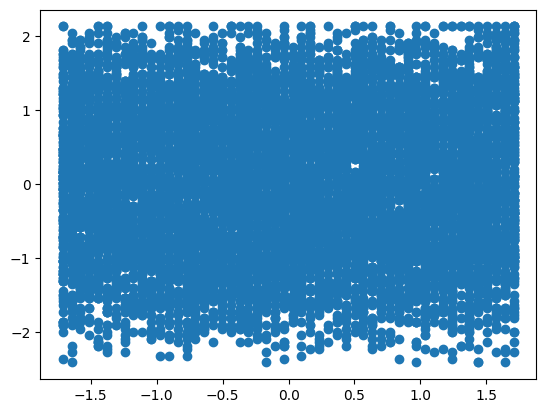

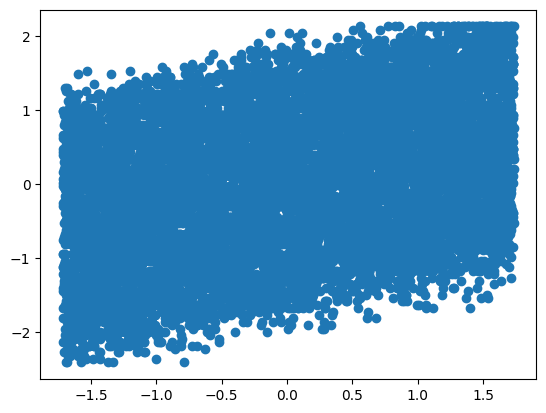

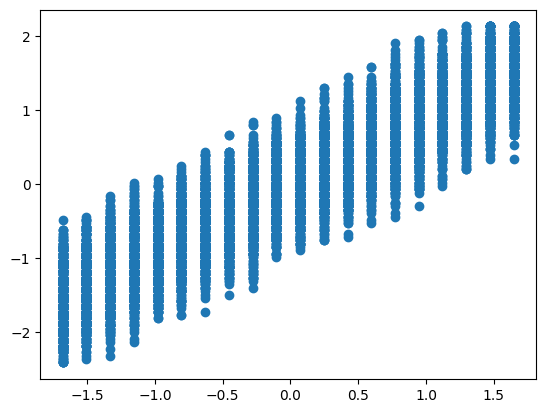

Correlation coefficient between age and spending score : -0.005222223093510161


In [ ]:
#checking Assumption#1: X and Y are linearly correlated
plt.scatter(df['Age'], df['SpendingScore'])
plt.show()

plt.scatter(df['Income'], df['SpendingScore'])
plt.show()

plt.scatter(df['OnlineShoppingFrequency'], df['SpendingScore'])
plt.show()

#the below graphs demonstrate the linear correlation between spending score and income & online shopping frequency
correlation_age_score = df['Age'].corr(df['SpendingScore']) #checking the linear correlation of age and spending score
print(f"Correlation coefficient between age and spending score : {correlation_age_score}")
#The correlation between age and spending score is very close to 0, showing that they are not linearly correlated at all

Shapiro-Wilk Test Statistic for the variables used in regression: 0.9846713116934515
P-value for the variables used in regression: 1.9438852862658802e-31


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


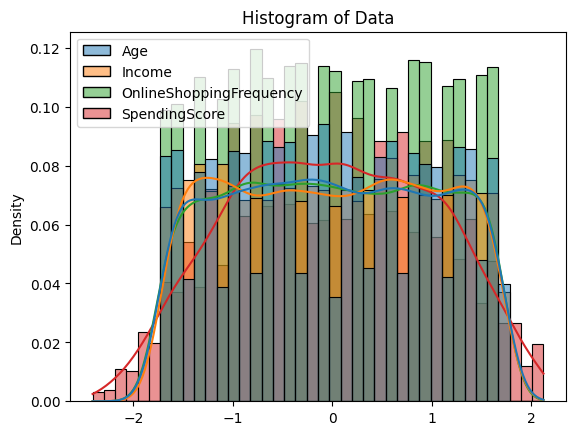

In [ ]:
#checking Assumption#2:
#Null Hypothesis: Data is normally distributed
from scipy.stats import shapiro
for column in reg_variables.columns:
  statistic, p_value = shapiro(reg_variables[column])
# Print the test statistic and p-value
print(f"Shapiro-Wilk Test Statistic for the variables used in regression: {statistic}")
print(f"P-value for the variables used in regression: {p_value}")
#the null hypothesis is rejected at the 5% level as the p - value < 0.05
#BUT since the N=10000>5000, "computed p-value may not be accurate."

#As per central limit theorem, the distribution of the sample mean (or sum) of a large number of independent, identically distributed random variables will be approximately normally distributed, regardless of the shape of the original distribution, as long as the sample size is large enough.
#with an N=10000, we can conclude that the data is approximately normally distributed.
#This can be further demonstrated with the histogram plotted below, which is roughly bell shaped.

import seaborn as sns
sns.histplot(reg_variables, kde=True, stat="density", bins=40)
plt.title("Histogram of Data")
plt.show()

In [ ]:
#checking Assumption#3
#null hypothesis: variances are homogeneous
#alternate hypothesis: variances are not homogenous
import numpy as np
from scipy.stats import levene

statistic, pvalue = levene(df['Age'], df['Income'], df['OnlineShoppingFrequency'])
print(f"Levene Test Statistic: {statistic}")
print(f"pvalue: {pvalue}")

#p-value=0.744>0.05 so null is not rejected.

Levene Test Statistic: 0.2957475685676996
pvalue: 0.7439773763310866


In [ ]:
#Regressing Y on X
X = sm.add_constant(X)
#OLS = ordinary least squares to minimise errors
model = sm.OLS(Y, X).fit() # fit the data on the model
model.params
residuals = model.resid
model.summary() #obtain the results of the regression
#Predicted Spending Score = 	1.481e-16 + 0.0021*Age + 0.3429*Income + 0.3429*Online Shopping Frequency

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SpendingScore   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                 6.126e+04
Date:                Sun, 01 Dec 2024   Prob (F-statistic):               0.00
Time:                        15:16:33   Log-Likelihood:                 633.57
No. Observations:               10000   AIC:                            -1259.
Df Residuals:                    9996   BIC:                            -1230.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1.481e-16      0.002   6.52e-14      1.000      -0.004       0.004
Age                         0.0021      0.002      0.919      0.358      -0.002       0.007
Income                      0.3429      0.002    150.948      0.000       0.338       0.347
OnlineShoppingFrequency     0.9140      0.002    402.318      0.000       0.910       0.918
==============================================================================
Omnibus:                        1.670   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.434   Jarque-Bera (JB):                1.696
Skew:                          -0.030   Prob(JB):                        0.428
Kurtosis:                       2.976   Cond. No.                         1.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Beginning the assessment of model performance
predicted_spendingscore = model.predict(X) #predicting spending score based on regression model
df['pred'] = predicted_spendingscore
df['error'] = Y - predicted_spendingscore #computing the error of the model
print(df[['Age','Income','OnlineShoppingFrequency','SpendingScore','pred', 'error']])

           Age    Income  OnlineShoppingFrequency  SpendingScore      pred  \
0     0.835671  1.202254                -0.979877      -0.897715 -0.481567   
1     1.707517 -0.276837                 1.471960       1.713320  1.253950   
2     0.165020 -0.161891                 0.771435       0.613937  0.649893   
3    -0.773891 -0.247450                -1.680401      -1.264176 -1.622289   
4     1.103931 -0.582441                -0.979877      -0.851907 -1.092986   
...        ...       ...                      ...            ...       ...   
9995  0.768606  0.050375                -0.454483      -0.485446 -0.396502   
9996  0.500346 -0.897123                -0.629614      -0.989330 -0.882026   
9997  0.902736  0.011431                -1.330139      -0.943523 -1.209891   
9998  1.372192  0.947487                 1.471960       1.530089  1.673076   
9999 -0.773891 -0.915095                 1.471960       1.117821  1.029909   

         error  
0    -0.416148  
1     0.459370  
2    -0.0359

In [ ]:
#calculating Mean Square Error
import sklearn.metrics
sklearn.metrics.mean_squared_error(Y, df['pred'])
#0.05158 is a low mean square error

0.05158159599202543

Shapiro-Wilk Test Statistic for the errors: 0.9998309887171788
pvalue for the errors: 0.6779355473024357


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


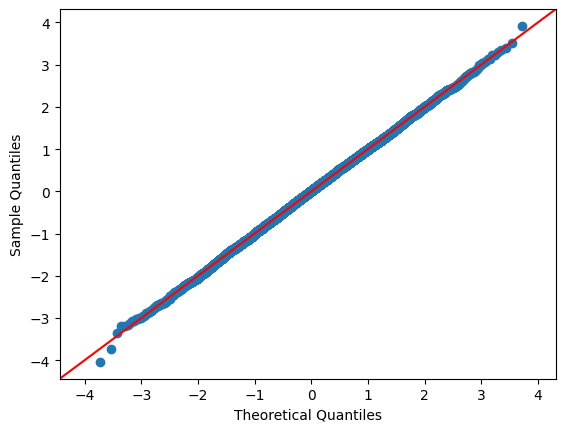

In [ ]:
#Checking Assumption 6
#Null Hypothesis: Error is normally distributed
from scipy.stats import shapiro
statistic, pvalue = shapiro(df['error'])
#the null hypothesis is not rejected at the 5% level as the p - value = 0.678 > 0.05
#the errors are normally distributed.
print(f"Shapiro-Wilk Test Statistic for the errors: {statistic}")
print(f"pvalue for the errors: {pvalue}")

#plotting a quantile-quantile curve
fig = sm.qqplot(df['error'],fit=True,line='45')
plt.show()
#most of the points being on the straight line further proves that the errors are normally distributed

In [ ]:
#checking Assumption#7
#null hypothesis: variances of errors are homogeneous
#alternate hypothesis: variances of errors are not homogenous
import numpy as np
from scipy.stats import levene

df['grouped_OnlineShoppingFrequency'] = pd.qcut(df['OnlineShoppingFrequency'], q=3, labels=["Low", "Medium", "High"]) #grouping data by online shopping frequency
residuals = model.resid
grouped_residuals = [residuals[df['grouped_OnlineShoppingFrequency'] == group] for group in df['grouped_OnlineShoppingFrequency'].unique()]
statistic, pvalue = levene(*grouped_residuals) #using levene's test to determine homogeneity of variance in residuals/errors.

print(f"Levene Test Statistic: {statistic}, pvalue: {pvalue}")

#p-value=0.715>0.05 so null is not rejected
#variance of errors when grouped by online shopping frequency (which had the greatest regression coefficient) is homogeneous

Levene Test Statistic: 0.33585674494682066, pvalue: 0.7147335507117722


In [ ]:
df.head()

,Cluster,CustomerID,Age,Gender,Income,SpendingScore,OnlineShoppingFrequency,PreferredChannel,CustomerSatisfaction,PromotionalEmailsOpened,ProductReturns,LoyaltyProgram,ConversionRate,pred,error,grouped_OnlineShoppingFrequency
0,3,1,0.835671,Male,1.202254,-0.897715,-0.979877,Online,9,40,5,0,0.045971,-0.481567,-0.416148,Low
1,4,2,1.707517,Female,-0.276837,1.713320,1.471960,In-Store,4,11,1,0,0.037305,1.253950,0.459370,High
2,4,3,0.165020,Female,-0.161891,0.613937,0.771435,In-Store,9,19,4,1,0.167028,0.649893,-0.035957,High
3,1,4,-0.773891,Female,-0.247450,-1.264176,-1.680401,Both,1,33,0,0,0.218419,-1.622289,0.358113,Low
4,1,5,1.103931,Male,-0.582441,-0.851907,-0.979877,Both,5,35,7,0,0.192754,-1.092986,0.241079,Low


The R-square of the model is 0.948, which is very high, despite the presence of Age, a statistically insignificant variable, which we suggest removing.

KNN v/s CART v/s Naive Bayes v/s Logistic Regression

**LOGISTIC REGRESSION LOOP**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, log_loss
import numpy as np

clusters = df['Cluster'].unique()

cluster_results = {}

# Iterative logistic regression for each cluster
for cluster in clusters:
    print(f"Processing Cluster {cluster}...")

    cluster_data = df[df['Cluster'] == cluster]
    X = cluster_data[['Age', 'Income', 'SpendingScore', 'OnlineShoppingFrequency']]
    y = cluster_data['LoyaltyProgram']

    # Running algorithm on just 20% of each cluster
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LogisticRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability of the positive class

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Calculate pseudo R-squared (McFadden's R-squared)
    ll_model = -log_loss(y_test, y_pred_prob, normalize=False)  # Log-likelihood of the fitted model
    y_null = y_train.mean()  # Mean prediction for the null model
    ll_null = -log_loss(y_test, np.full_like(y_test, y_null), normalize=False)  # Log-likelihood of the null model
    mcfadden_r2 = 1 - (ll_model / ll_null)
    coefficients = model.coef_[0]  # Coefficients for each feature
    intercept = model.intercept_[0]  # Intercept term

    print("Intercept (β0):", intercept)
    print("Coefficients (β1, β2, ...):", coefficients)

    # Save results for the cluster
    cluster_results[cluster] = {
        'Model': model,
        'Accuracy': accuracy,
        'Classification Report': report,
        'Pseudo R-squared': mcfadden_r2
    }

    print(f"Accuracy for Cluster {cluster}: {accuracy:.2f}")
    print(f"Classification Report for Cluster {cluster}:")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(f"Pseudo R-squared for Cluster {cluster}: {mcfadden_r2:.4f}")


Processing Cluster 3...
Intercept (β0): 0.09930895822397598
Coefficients (β1, β2, ...): [ 0.00814611 -0.17386221  0.08230041 -0.14158057]
Accuracy for Cluster 3: 0.44
Classification Report for Cluster 3:
Confusion Matrix:
 [[ 78 170]
 [ 97 136]]
              precision    recall  f1-score   support

           0       0.45      0.31      0.37       248
           1       0.44      0.58      0.50       233

    accuracy                           0.44       481
   macro avg       0.45      0.45      0.44       481
weighted avg       0.45      0.44      0.43       481

Pseudo R-squared for Cluster 3: 0.9600
Processing Cluster 4...
Intercept (β0): -0.5683531606611864
Coefficients (β1, β2, ...): [-0.08335321 -0.22002424  0.03776003  0.29293541]
Accuracy for Cluster 4: 0.53
Classification Report for Cluster 4:
Confusion Matrix:
 [[94 66]
 [80 73]]
              precision    recall  f1-score   support

           0       0.54      0.59      0.56       160
           1       0.53      0.48    

**NAIVE BAYES**


Confusion Matrix for Naive Bayes:


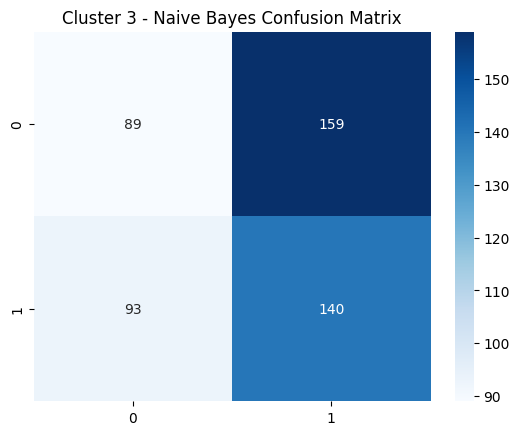


Confusion Matrix for Naive Bayes:


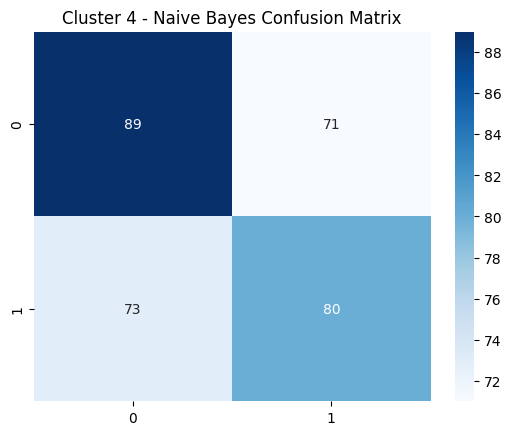


Confusion Matrix for Naive Bayes:


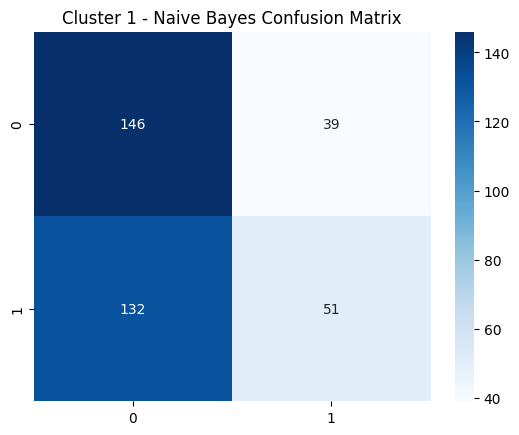


Confusion Matrix for Naive Bayes:


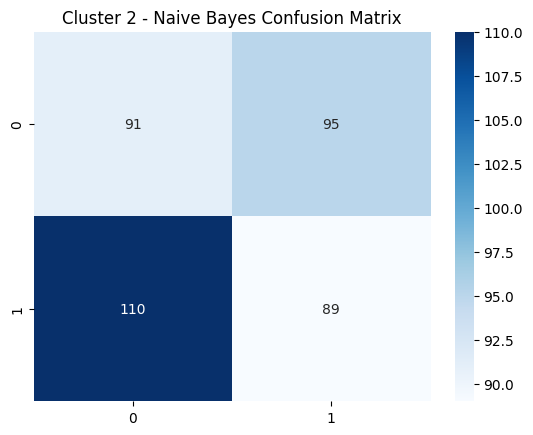


Confusion Matrix for Naive Bayes:


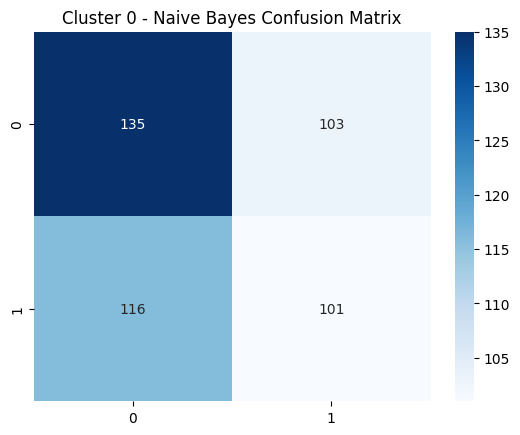


Summary of Results:
   cluster  nb_accuracy  nb_precision  nb_recall     nb_f1
0        3     0.476091      0.468227   0.600858  0.526316
1        4     0.539936      0.529801   0.522876  0.526316
2        1     0.535326      0.566667   0.278689  0.373626
3        2     0.467532      0.483696   0.447236  0.464752
4        0     0.518681      0.495098   0.465438  0.479810


In [ ]:
#iterative loop on naive bayes for each cluster
#importing the necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

features = ['Age', 'Income', 'SpendingScore', 'OnlineShoppingFrequency'] #independent variables
target = 'LoyaltyProgram' #dependent variable--(Yes/No)


# Extract features (X) and target (Y)
X = df[features]
Y = df[target]

# Iterate over each cluster
results = []#stores result in results for each cluster

clusters = df['Cluster'].unique() #obtaining this from the dataset itself

for cluster in clusters:
    # Subset the data for the current cluster
    cluster_data = df[df['Cluster'] == cluster]

    # Redefine X and Y for the current cluster
    X_cluster = cluster_data[features]
    Y_cluster = cluster_data[target]

    # Split into training and test sets-(splits into 80-20 ration- 80% training and 20% testing)
    X_train, X_test, Y_train, Y_test = train_test_split(X_cluster, Y_cluster, test_size=0.2, random_state=42)

    # --- Naive Bayes ---
    nb_model = GaussianNB() #initialization of the gaussian model
    nb_model.fit(X_train, Y_train) #train naive bayes on training data
    Y_pred_nb = nb_model.predict(X_test) #making predictions on the test data

    # Metrics for Naive Bayes
    nb_accuracy = accuracy_score(Y_test, Y_pred_nb)
    nb_precision = precision_score(Y_test, Y_pred_nb, pos_label=1) #indiactes how well the model avoids false positives
    nb_recall = recall_score(Y_test, Y_pred_nb, pos_label=1) # indiactes how well the model identifies actual positives
    nb_f1 = f1_score(Y_test, Y_pred_nb, pos_label=1) #helps in balancing recall and precision

    #CONFUSION MATRIX
    #Helps in visuaization of False Positive and True Positive
    #
    print("\nConfusion Matrix for Naive Bayes:")
    cm_nb = confusion_matrix(Y_test, Y_pred_nb)
    sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Cluster {cluster} - Naive Bayes Confusion Matrix")
    plt.show()

    # Store results
    results.append({
        'cluster': cluster,
        'nb_accuracy': nb_accuracy,
        'nb_precision': nb_precision,
        'nb_recall': nb_recall,
        'nb_f1': nb_f1,
    })

# Summary of all clusters
# Convert the results list into a DataFrame for easier visualization and analysis
results_df = pd.DataFrame(results)
print("\nSummary of Results:")
print(results_df)


results_df.to_csv("naive_bayes_cluster_results.csv", index=False)

**KNN**

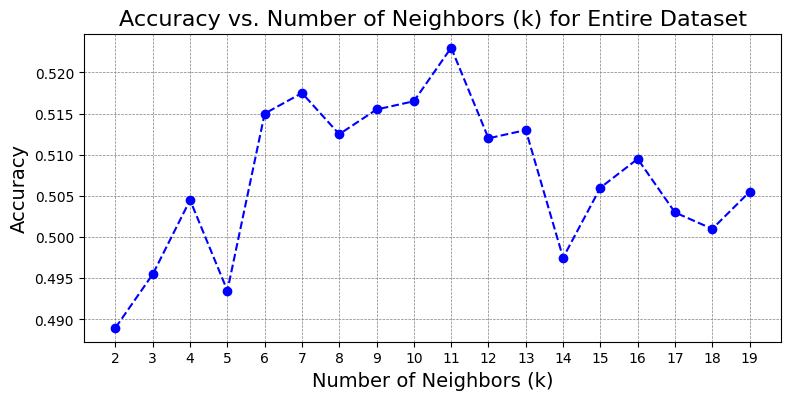

The optimal number of neighbors (k) for the entire dataset is: 11


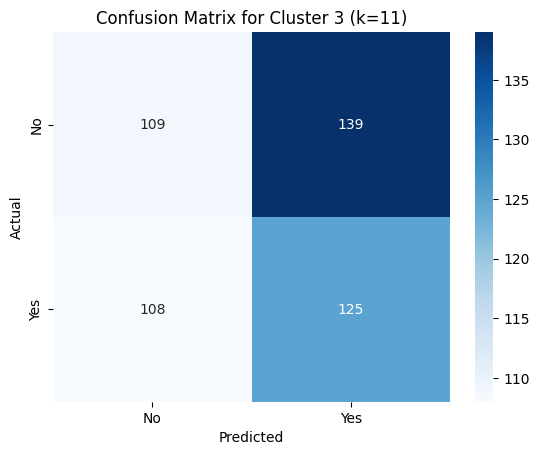

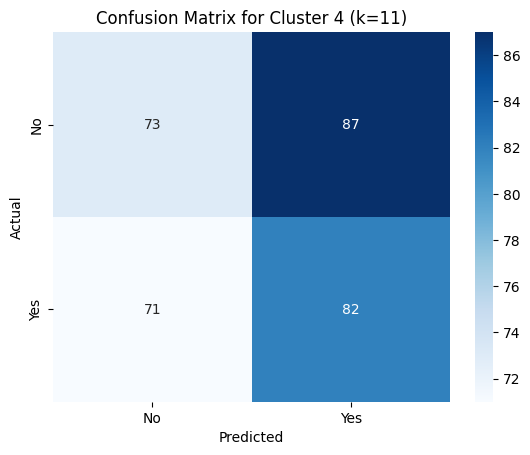

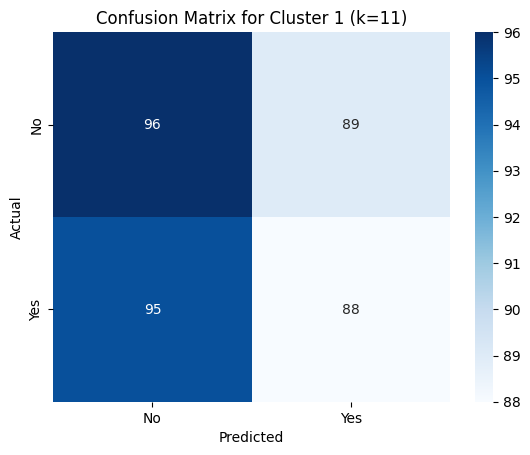

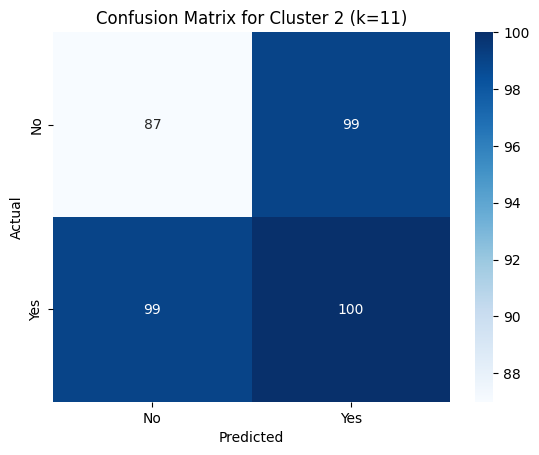

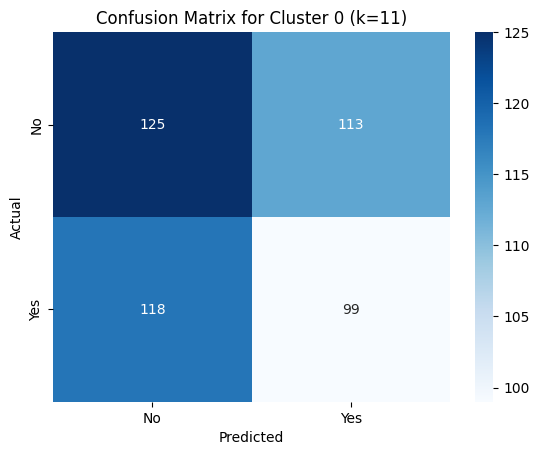

[{'Cluster': 3, 'Accuracy': 0.4864864864864865, 'Precision': 0.4734848484848485, 'Recall': 0.5364806866952789, 'F1 Score': 0.5030181086519114}, {'Cluster': 4, 'Accuracy': 0.4952076677316294, 'Precision': 0.48520710059171596, 'Recall': 0.5359477124183006, 'F1 Score': 0.5093167701863354}, {'Cluster': 1, 'Accuracy': 0.5, 'Precision': 0.4971751412429379, 'Recall': 0.4808743169398907, 'F1 Score': 0.4888888888888889}, {'Cluster': 2, 'Accuracy': 0.4857142857142857, 'Precision': 0.5025125628140703, 'Recall': 0.5025125628140703, 'F1 Score': 0.5025125628140703}, {'Cluster': 0, 'Accuracy': 0.49230769230769234, 'Precision': 0.4669811320754717, 'Recall': 0.45622119815668205, 'F1 Score': 0.46153846153846156}]

Summary of Results for Each Cluster:
   Cluster  Accuracy  Precision    Recall  F1 Score
0        3  0.486486   0.473485  0.536481  0.503018
1        4  0.495208   0.485207  0.535948  0.509317
2        1  0.500000   0.497175  0.480874  0.488889
3        2  0.485714   0.502513  0.502513  0.5025

In [ ]:
# iterative KNN for each cluster
#importing libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define features and target variable
#feature engineering: selecting relevant features for the KNN model
#Customer demographics(Age, Gender) & Spending Behaviour(SpendingScore,OnlineShoppingFrequency)
features = ['Age', 'Gender', 'Income', 'SpendingScore', 'OnlineShoppingFrequency'] #independent
target = 'LoyaltyProgram'#dependent

# Ensure Gender is encoded
#Also known as feature engineering
if 'Gender' in features: #male->0 , female->1
    gender_encoder = LabelEncoder() #convert categorical data into a numerical format
    df['Gender'] = gender_encoder.fit_transform(df['Gender'])

# Step 1: Determine the optimal k for the entire dataset
X_full = df[features] #splits features into independent variables
Y_full = df[target]

# Splitting the full dataset-(splits into 80-20 ration- 80% training and 20% testing)
X_train_full, X_test_full, Y_train_full, Y_test_full = train_test_split(X_full, Y_full, test_size=0.2, random_state=42)

# Finding the optimal k
k_range_full = range(2,20)
result = [] #create an empty list to append the k and find the highest one as the most optimal one

for k in k_range_full: #runs a for loop k number one times
    knn_classifier_full = KNeighborsClassifier(metric='euclidean', n_neighbors=k)
    knn_classifier_full.fit(X_train_full, Y_train_full)
    Y_pred_full = knn_classifier_full.predict(X_test_full)
    result.append(accuracy_score(Y_test_full, Y_pred_full))

# Plotting Accuracy vs. Number of Neighbors (k)
plt.figure(figsize=(9, 4))
plt.plot(k_range_full, result, marker='o', linestyle='--', color='b')
plt.title('Accuracy vs. Number of Neighbors (k) for Entire Dataset', fontsize=16)
plt.xlabel('Number of Neighbors (k)', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(k_range_full)
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.show()

# Selecting the optimal k for the entire dataset
optimal_k_full = k_range_full[result.index(max(result))] #selects the k with the maximum accuracy from the list
print(f"The optimal number of neighbors (k) for the entire dataset is: {optimal_k_full}")
# using optimal k to evaluate performance for each cluster
# Step 2: Use the optimal k for KNN in each cluster
fin_result = []

clusters = df['Cluster'].unique()  # Assuming the 'Cluster' column exists

for cluster in clusters:
    # Subset the data for the current cluster
    cluster_data = df[df['Cluster'] == cluster]

    # Extract features and target for the current cluster
    X_cluster = cluster_data[features]
    Y_cluster = cluster_data[target]

    # Splitting the cluster dataset
    X_train_cluster, X_test_cluster, Y_train_cluster, Y_test_cluster = train_test_split(
        X_cluster, Y_cluster, test_size=0.2, random_state=42
    )

    # Train KNN with the fixed optimal k
    knn_model_cluster = KNeighborsClassifier(metric='euclidean', n_neighbors=optimal_k_full)
    knn_model_cluster.fit(X_train_cluster, Y_train_cluster)
    Y_pred_cluster = knn_model_cluster.predict(X_test_cluster)

    # Calculate metrics for the cluster
    cluster_accuracy = accuracy_score(Y_test_cluster, Y_pred_cluster)
    cluster_precision = precision_score(Y_test_cluster, Y_pred_cluster, zero_division=1)
    cluster_recall = recall_score(Y_test_cluster, Y_pred_cluster, zero_division=1)
    cluster_f1 = f1_score(Y_test_cluster, Y_pred_cluster, zero_division=1)

    # Confusion Matrix for the current cluster
    #helpful in the breakdown of prediction outcomes(True positives, False positives)
    cm_cluster = confusion_matrix(Y_test_cluster, Y_pred_cluster)
    sns.heatmap(cm_cluster, annot=True, cmap='Blues',fmt='d', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f"Confusion Matrix for Cluster {cluster} (k={optimal_k_full})")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Append the results
    fin_result.append({
        'Cluster': cluster,
        'Accuracy': cluster_accuracy, #reflects the accuracy for each cluster, correct predictions(TN and TP)
        'Precision': cluster_precision, #indicates how well the model avoids false positives
        'Recall': cluster_recall, #indicates model's ability to idenitfy actual positives
        #FI is the harmonic mean of precision and recall, providing a single metric that balances
        #both the model’s ability to correctly label positive cases and its tendency to not miss out on actual positive cases.
        'F1 Score': cluster_f1, #helps in balancing recall and precision
    })
print(fin_result, end="\n")

# Summary of Results for All Clusters
fin_result_df = pd.DataFrame(fin_result)
print("\nSummary of Results for Each Cluster:")
print(fin_result_df)


**CART**

Performing CART for Cluster 3
Accuracy for CART in Cluster 3: 0.48


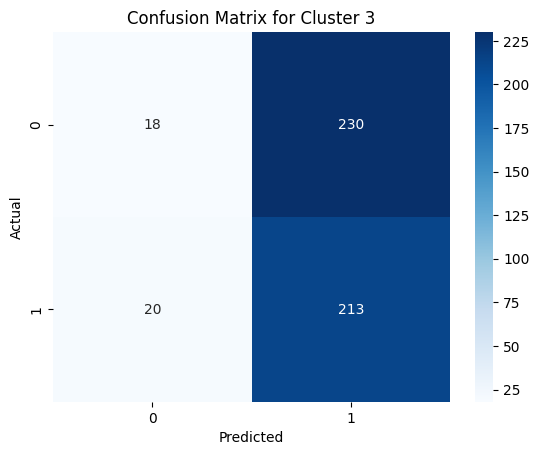

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.07      0.13       248
           1       0.48      0.91      0.63       233

    accuracy                           0.48       481
   macro avg       0.48      0.49      0.38       481
weighted avg       0.48      0.48      0.37       481



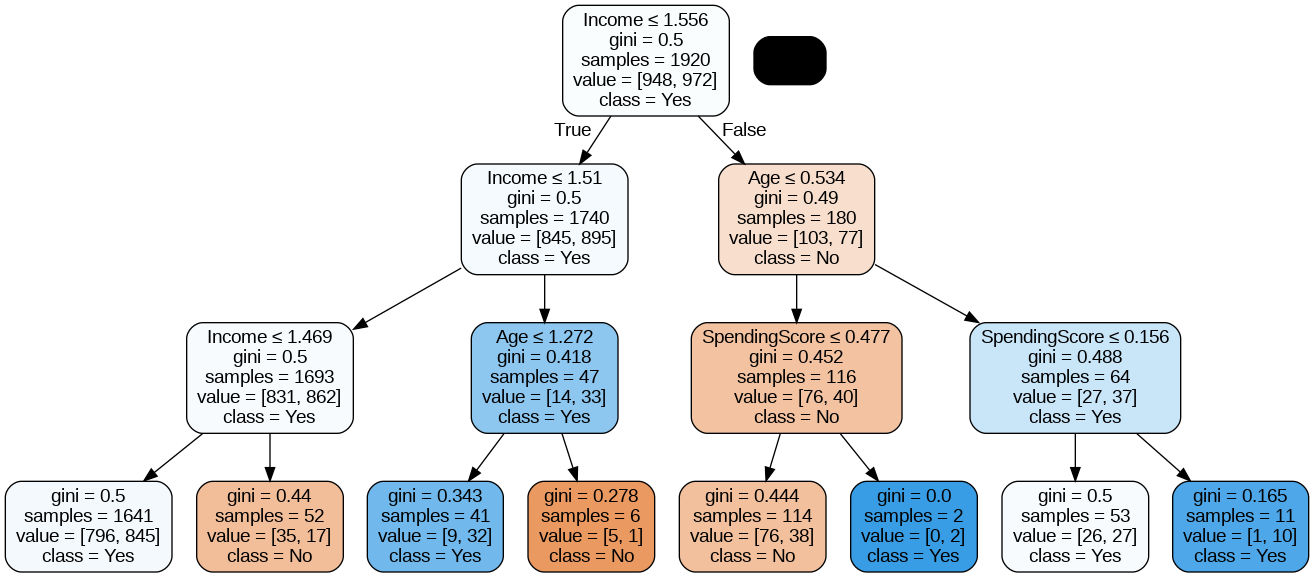

Performing CART for Cluster 4
Accuracy for CART in Cluster 4: 0.52


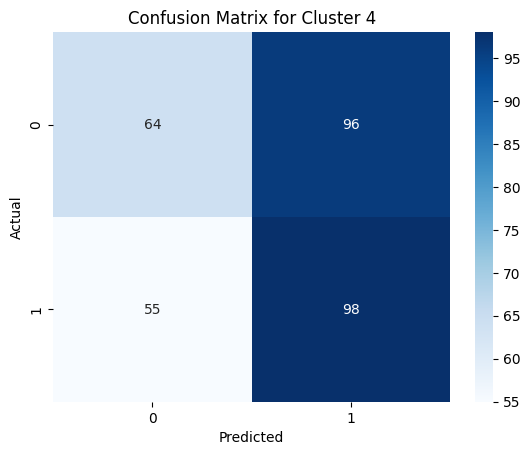

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.40      0.46       160
           1       0.51      0.64      0.56       153

    accuracy                           0.52       313
   macro avg       0.52      0.52      0.51       313
weighted avg       0.52      0.52      0.51       313



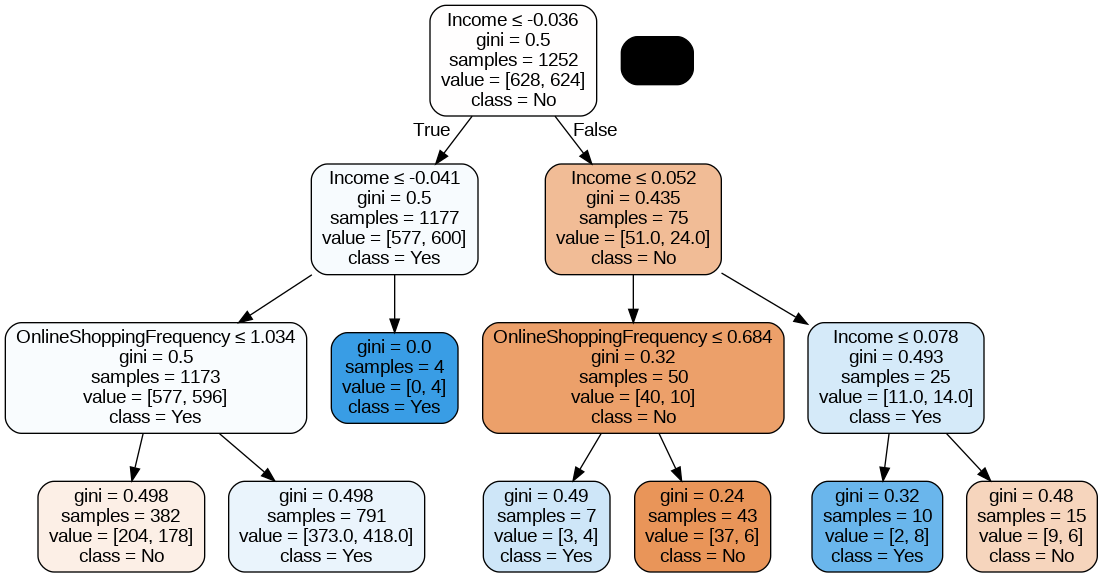

Performing CART for Cluster 1
Accuracy for CART in Cluster 1: 0.52


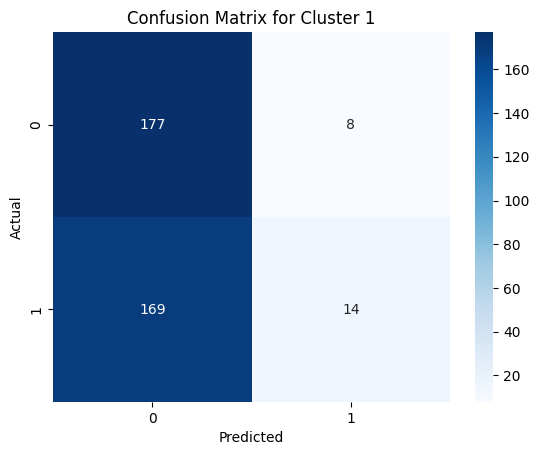

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.96      0.67       185
           1       0.64      0.08      0.14       183

    accuracy                           0.52       368
   macro avg       0.57      0.52      0.40       368
weighted avg       0.57      0.52      0.40       368



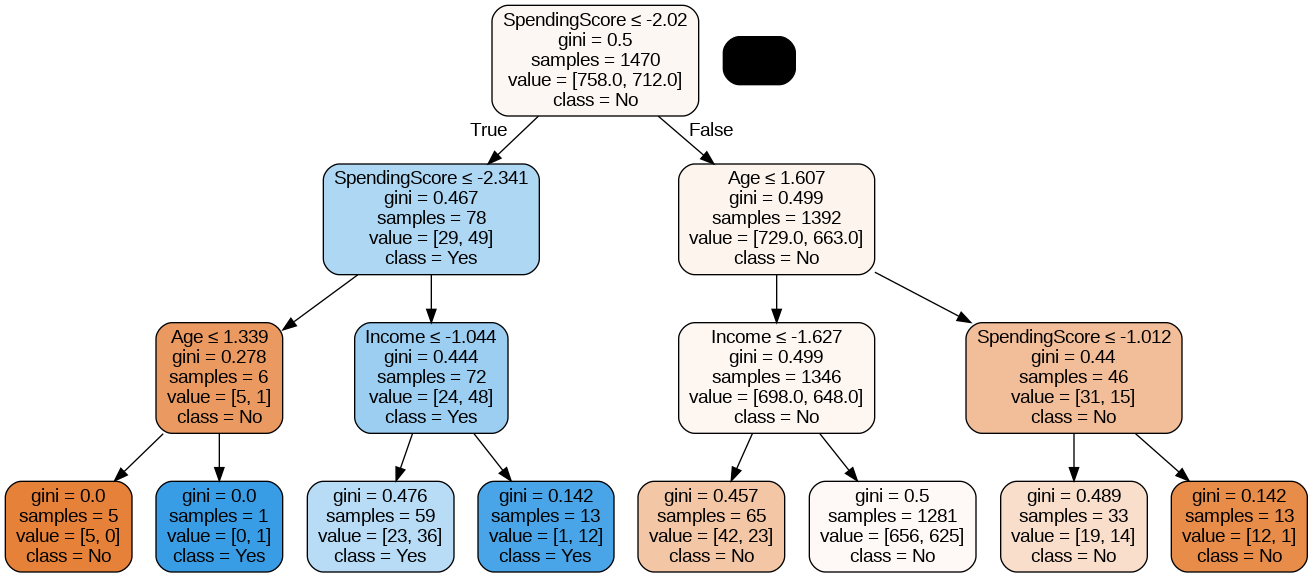

Performing CART for Cluster 2
Accuracy for CART in Cluster 2: 0.50


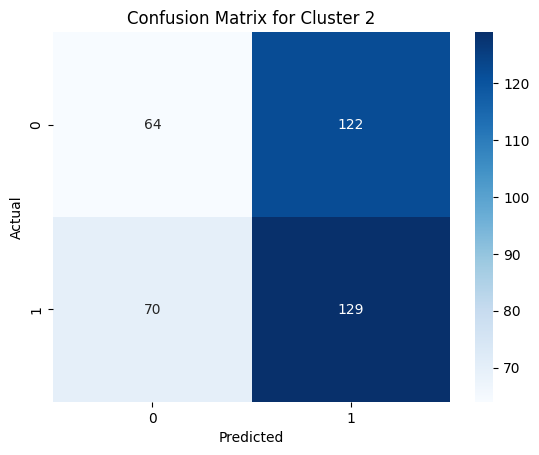

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.34      0.40       186
           1       0.51      0.65      0.57       199

    accuracy                           0.50       385
   macro avg       0.50      0.50      0.49       385
weighted avg       0.50      0.50      0.49       385



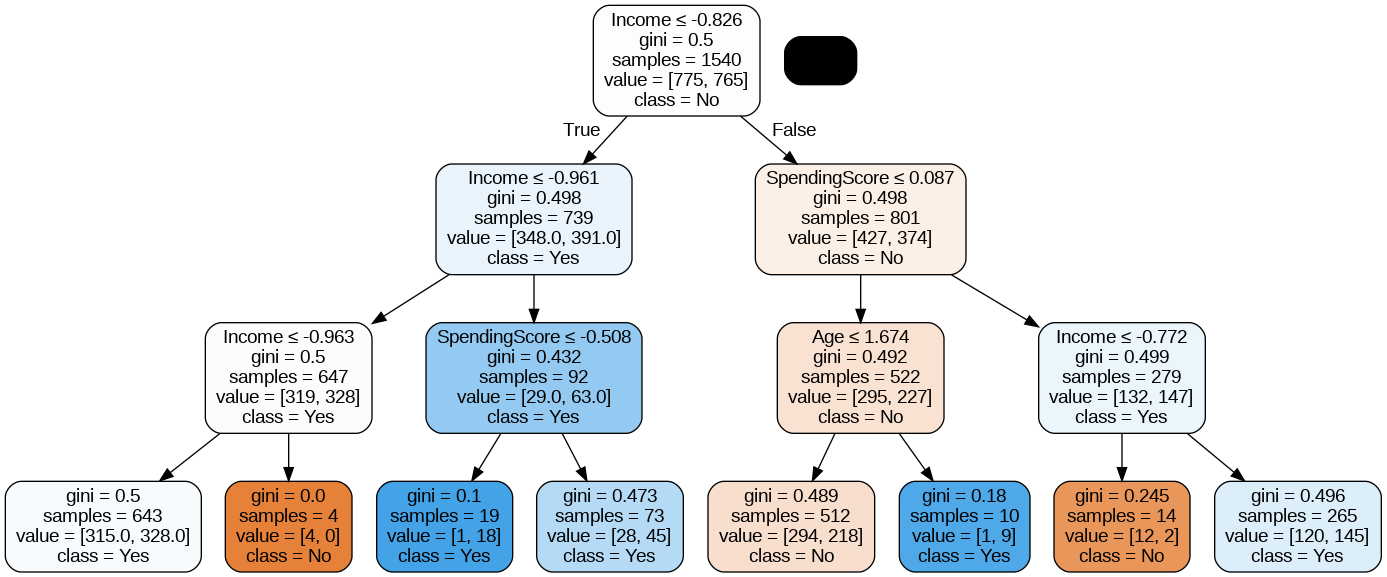

Performing CART for Cluster 0
Accuracy for CART in Cluster 0: 0.53


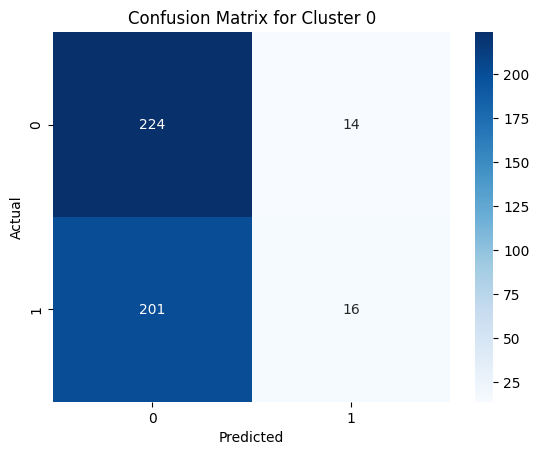

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.94      0.68       238
           1       0.53      0.07      0.13       217

    accuracy                           0.53       455
   macro avg       0.53      0.51      0.40       455
weighted avg       0.53      0.53      0.42       455



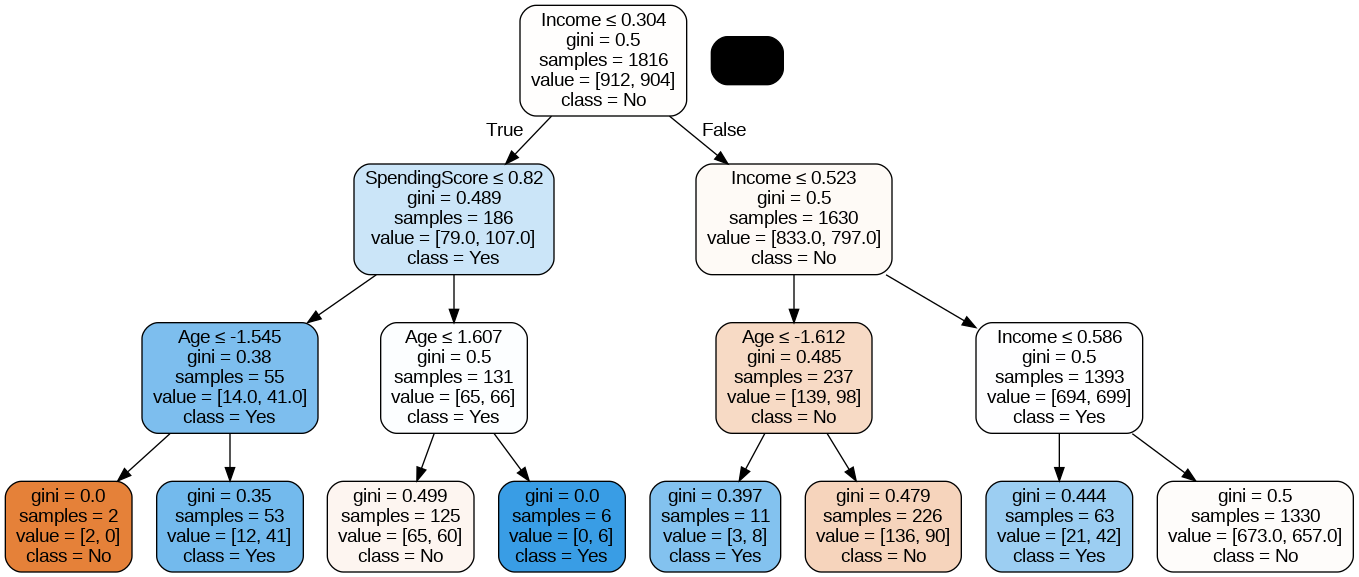

In [ ]:
from six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#Defining a function to run CART for each cluster and printing the trees
def perform_cart_for_cluster(cluster_data, cluster_id):
    print(f"Performing CART for Cluster {cluster_id}")

    features = ["Age", "Income", "SpendingScore", "OnlineShoppingFrequency", "Gender"]
    target = "LoyaltyProgram"

    X = cluster_data[features].values
    y = cluster_data[target].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = DecisionTreeClassifier(max_depth=3, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(f"Accuracy for CART in Cluster {cluster_id}: {accuracy_score(y_test, y_pred):.2f}")

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for Cluster {cluster_id}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print("Classification Report:\n", classification_report(y_test, y_pred))
#Creating the images as png file and saving it in local memory
    dot_data = StringIO()
    export_graphviz(clf, out_file=dot_data, filled=True, rounded=True,
                    special_characters=True, feature_names=features, class_names=['No', 'Yes'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png(f'cluster_{cluster_id}_decision_tree.png')
    display(Image(graph.create_png()))

for cluster_id in df['Cluster'].unique():
  cluster_data = df[df['Cluster'] == cluster_id]
  perform_cart_for_cluster(cluster_data, cluster_id)
